# PREDICCIÓN DE BENEFICIOS POZO PETROLERO

La compañía de extracción de petróleo OilyGiant necesita determinar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para esta tarea, se han determinado los siguientes objetivos:

- Utilizar como base del análisis a los parámetros recogidos de pozos petrolíferos en cada región: calidad de crudo y volumen de reservas.
- Crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Hay que tomar en cuenta las siguientes condiciones:

- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Después de la evaluación de riesgo, mantener solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

## Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy.stats import norm

## Importación de Datos

In [2]:
region_0 = pd.read_csv('/datasets/geo_data_0.csv')
region_1 = pd.read_csv('/datasets/geo_data_1.csv')
region_2 = pd.read_csv('/datasets/geo_data_2.csv')

##  Exploración de Datos

### Tabla Región  0

In [3]:
region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
region_0.sample(10)

,id,f0,f1,f2,product
28861,XdyjY,-0.181917,1.122929,4.608457,100.078618
11513,ky3Ub,0.033128,0.178968,-4.776952,69.330416
75857,xALlf,0.116105,0.267614,1.382148,185.044438
29042,Bk4F1,-0.838193,0.750407,-0.081518,53.616562
13867,R11IM,1.167194,-0.427079,7.604429,126.001784
94571,Iywl2,-0.165963,0.444365,7.462211,136.487773
58595,gNUBF,-0.985734,0.062183,2.583277,56.094650
53795,rwklk,1.961004,0.403839,-2.395686,53.620789
12981,J8X7n,0.071244,0.258531,3.383900,42.543149
53520,G5VJa,0.573288,0.802772,-2.083930,74.884359


In [5]:
#Eliminación Columna id
region_0 = region_0.drop('id',axis=1)
region_0.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [6]:
#Resumen de estadísticas por columna
region_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
#Tabla de comparación valores de columnas
variables_0 = pd.DataFrame({'min':[region_0['f0'].min(),region_0['f1'].min(),region_0['f2'].min()],
                          'mean':[region_0['f0'].mean(),region_0['f1'].mean(),region_0['f2'].mean()],
                          'max':[region_0['f0'].max(),region_0['f1'].mean(),region_0['f2'].max()]},
                        index=('f0','f1','f2'))

- No existen datos nulos en la tabla
- Se elimina la columna de ID pues no es significativa para el entrenamiento del modelo
- Los valores de las variables están dentro de rangos similares. No existe una notable diferencia de escalas, mismas que se resumen en la siguiente tabla:


In [8]:
variables_0

,min,mean,max
f0,-1.408605,0.500419,2.362331
f1,-0.848218,0.250143,0.250143
f2,-12.088328,2.502647,16.003790


 ### Tabla Región 1

In [9]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
region_1.sample(10)

,id,f0,f1,f2,product
19097,4MwPB,4.796307,-0.725469,1.005011,26.953261
3465,Qb8Cj,0.531538,-9.629144,3.000029,84.038886
65455,UsU5P,-5.450849,-8.553381,1.001640,30.132364
91002,VbJUi,10.066318,-0.727316,5.006942,134.766305
33282,klo3P,7.525369,5.962200,1.002381,26.953261
81928,xKmDK,13.123162,1.763094,5.002104,134.766305
64219,B7pxB,-4.745422,-7.102273,4.004014,110.992147
70946,KStzI,15.562663,-10.900918,5.000761,134.766305
63613,Ge407,-6.727218,-17.791058,2.994555,84.038886
71999,gsoEA,-12.931676,0.545904,4.004089,110.992147


In [11]:
#Eliminación Columna id
region_1 = region_1.drop('id',axis=1)
region_1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [12]:
#Resumen de estadísticas por columna
region_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [13]:
#Tabla de comparación valores de columnas
variables_1 = pd.DataFrame({'min':[region_1['f0'].min(),region_1['f1'].min(),region_1['f2'].min()],
                            
                          'mean':[region_1['f0'].mean(),region_1['f1'].mean(),region_1['f2'].mean()],
                          'max':[region_1['f0'].max(),region_1['f1'].mean(),region_1['f2'].max()]},
                        index=('f0','f1','f2'))



- No existen datos nulos en la tabla
- Se elimina la columna de ID pues no es significativa para el entrenamiento del modelo
- Los valores de las variables están dentro de rangos similares. No existe una notable diferencia de escalas, mismas que se resumen en la siguiente tabla:

In [14]:
variables_1

,min,mean,max
f0,-31.609576,1.141296,29.421755
f1,-26.358598,-4.796579,-4.796579
f2,-0.018144,2.494541,5.019721


 ### Tabla Región 2

In [15]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [16]:
region_2.sample(10)

,id,f0,f1,f2,product
25069,ELkPd,-2.856137,-0.726742,6.384667,155.296289
57208,wJ9Rs,1.055109,-2.007736,3.704554,101.503191
31959,baSpP,-0.834164,-2.847564,4.309993,180.883815
86942,wur1u,0.501574,0.172209,0.309756,26.036776
96896,ZhE5n,-1.021783,-1.077823,-2.362569,64.599051
21870,hQEnE,-0.302948,2.348216,-2.984205,76.918579
27004,PxH8I,-1.503664,0.331376,7.555615,129.824663
16611,SBZOv,0.509147,3.536783,-1.476442,107.009109
36717,DjZHV,1.157899,-0.074206,-1.172367,35.015824
69514,PZSqX,1.945766,0.317292,-0.427201,73.013270


In [17]:
#Eliminación Columna id
region_2 = region_2.drop('id',axis=1)
region_2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


In [18]:
#Resumen de estadísticas por columna
region_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [19]:
#Tabla de comparación valores de columnas
variables_2 = pd.DataFrame({'min':[region_2['f0'].min(),region_2['f1'].min(),region_2['f2'].min()],
                            
                          'mean':[region_2['f0'].mean(),region_2['f1'].mean(),region_2['f2'].mean()],
                          'max':[region_2['f0'].max(),region_2['f1'].mean(),region_2['f2'].max()]},
                        index=('f0','f1','f2'))


- No existen datos nulos en la tabla
- Se elimina la columna de ID pues no es significativa para el entrenamiento del modelo
- Los valores de las variables están dentro de rangos similares. No existe una notable diferencia de escalas, mismas que se resumen en la siguiente tabla:


In [20]:
variables_2

,min,mean,max
f0,-8.760004,0.002023,7.238262
f1,-7.084020,-0.002081,-0.002081
f2,-11.970335,2.495128,16.739402


## Separación - Entrenamiento 

In [21]:
#Función separación y entrenamiento del modelo
def split_model(data):
    features = data.drop('product',axis=1)
    target = data['product']
    features_train,features_valid,target_train,target_valid = train_test_split(features,target,
                                                                           test_size=0.25,
                                                                           random_state=12345)
    model = LinearRegression()
    model.fit(features_train,target_train)
    predicted_valid = model.predict(features_valid)
    mse = mean_squared_error(target_valid,predicted_valid)
    rmse = mse**0.5
    print ('RSME:',rmse, '| Volumen Medio de Reservas:',predicted_valid.mean())
    return target_valid,pd.Series(predicted_valid,index=target_valid.index)

**Region 0**

In [22]:
target_0,predicted_0 = split_model(region_0)

RSME: 37.5794217150813 | Volumen Medio de Reservas: 92.59256778438035


**Region 1**

In [23]:
target_1,predicted_1 = split_model(region_1)

RSME: 0.893099286775617 | Volumen Medio de Reservas: 68.728546895446


**Región 2**

In [24]:
target_2,predicted_2 = split_model(region_2)

RSME: 40.02970873393434 | Volumen Medio de Reservas: 94.96504596800489


- El RSME indica que para la región 1, el modelo predice con un error muy bajo las unidades de los pozos, a diferencia de las regiones 0 y 2, donde el RSME está en 37 y 40 respectivamente, indicando que el modelo tiene un error acumulado mucho mayor al predecir.
- El volumen medio de Reservas predicho por el modelo es mas alto en la región 2, seguido muy de cerca por la región 0. La región 1 tiene reservas mucho menores.
- Las variables f1 y f0 tienen un rango mucho mas amplio en la tabla de la región 1, puede ser esta la razón por la que el modelo puede generar una regresión con menor RMSE comparado con las predicciones en las otras regiones.

## Estimación de Ganancias

### Constantes

In [25]:
investment = 100000000
oil_wells = 200
earnings_unit = 4500

###  Ganancias Y Unidades

In [26]:
# Función calculo de mejores pozos y sus ganancias
def earnings(target,predicted):
    
    best_wells = predicted.sort_values(ascending=False)
    units = target[best_wells.index][:oil_wells].sum()
    earnings = (units*earnings_unit)-investment
    
    return earnings,units
    

**Ganancias Potenciales Región 0**

In [27]:
earnings_r0,units_r0 = earnings(target_0,predicted_0)
print('Potencial para 200 pozos:')
print(f"Unidades totales= {units_r0:.2f} | Ganancia total= ${earnings_r0:.2f}")

Potencial para 200 pozos:
Unidades totales= 29601.84 | Ganancia total= $33208260.43


**Ganancias Potenciales Región 1**

In [28]:
earnings_r1,units_r1 = earnings(target_1,predicted_1)
print('Potencial para 200 pozos:')
print(f"Unidades totales= {units_r1:.2f} | Ganancia total= ${earnings_r1:.2f}")

Potencial para 200 pozos:
Unidades totales= 27589.08 | Ganancia total= $24150866.97


**Ganancias Potenciales Región 2**

In [29]:
earnings_r2,units_r2 = earnings(target_2,predicted_2)
print('Potencial para 200 pozos:')
print(f"Unidades totales= {units_r2:.2f} | Ganancia total= ${earnings_r2:.2f}")

Potencial para 200 pozos:
Unidades totales= 28245.22 | Ganancia total= $27103499.64


**Comparación Regiones**

In [30]:
#Tabla de comparación ganancias estimadas por región
region_estimated = pd.DataFrame({'Unidades':[units_r0,units_r1,units_r2],
                          'Ganacias':[earnings_r0,earnings_r1,earnings_r2]},
                        index=('Region 0','Region 1','Region 2'))
region_estimated

,Unidades,Ganacias
Region 0,29601.835651,3.320826e+07
Region 1,27589.081548,2.415087e+07
Region 2,28245.222141,2.710350e+07


De acuerdo a las Unidades y las ganacias potenciales para los mejores 200 pozos, la mas adecuada para hacer la inversión es la Región 0, con un ingreso estimado de 33 millones sobre la inversión.

## Ganancias Y Riesgos

In [31]:
#Función para hacer bootstraping
def boots(target,predicted):
    #Variable state para poder replicar el experimento
    state = np.random.RandomState(1234)
    values = []
    
    for i in range(1000):
        #Analizamos muestras de 500 pozos como indican las condiciones
        subsample = target.sample(n=500,replace=True,random_state=state)
        pred_subsample = predicted [subsample.index]
        
        #Obtenemos la ganancia para los mejores 200 pozos de cada muestra
        earning = earnings(subsample,pred_subsample)[0]
        values.append(earning)
    
    values = pd.Series(values)
    #Obtenemos los límites para un 95% de probabilidad y el promedio
    lower = values.quantile(0.025,interpolation='linear')
    upper = values.quantile(0.975,interpolation='linear')
    avg = values.mean()
    #Cálculo de pérdidas con función de distribución acumulativa para el valor 0
    lost = norm.cdf((0-avg)/np.std(values))*100
    
    values.hist(bins=20,color='skyblue')
    plt.title('Earnings Distribution For 200 Best Oil Wells')
    plt.xlabel('Revenue/USD')
    plt.axvline(x=lower, color='green',linestyle='dotted')
    plt.axvline(x=upper, color='green',linestyle='dotted')
    plt.axvline(x=avg, color='red',linestyle='dotted')
    plt.grid(False)
    plt.show()
    
    print(f'Intervalo de Confianza con 95% Probabilidad:[${lower:.2f} a ${upper:.2f}]')
    print(f'Ganancia Media: ${avg:.2f}')
    print(f'Pérdidas: {lost:.2f}%')
    
    return lower,avg,upper,lost

**Region 0**

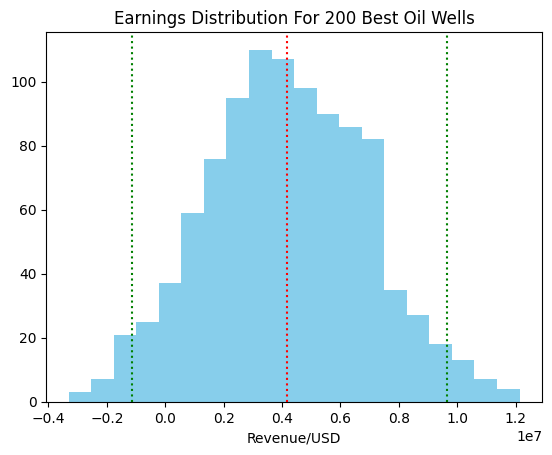

Intervalo de Confianza con 95% Probabilidad:[$-1128399.19 a $9649348.86]
Ganancia Media: $4178188.53
Pérdidas: 6.36%


In [32]:
lower_0,avg_0,upper_0,lost_0 = boots(target_0,predicted_0)

**Region 1**

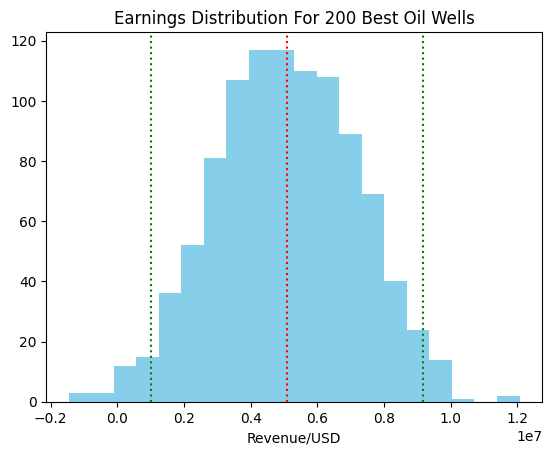

Intervalo de Confianza con 95% Probabilidad:[$1002406.01 a $9164983.42]
Ganancia Media: $5077401.96
Pérdidas: 0.79%


In [33]:
lower_1,avg_1,upper_1,lost_1 = boots(target_1,predicted_1)

**Region 2**

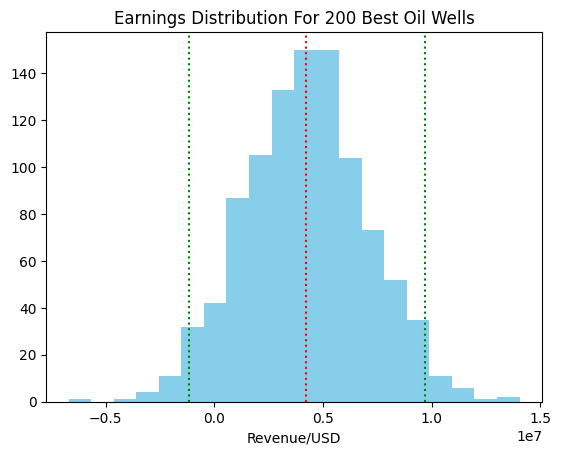

Intervalo de Confianza con 95% Probabilidad:[$-1154016.67 a $9678324.16]
Ganancia Media: $4234595.58
Pérdidas: 6.57%


In [34]:
lower_2,avg_2,upper_2,lost_2 = boots(target_2,predicted_2)

In [35]:
#Tabla de comparación Intervalo de confianza
region_revenue = pd.DataFrame({'Min':[lower_0,lower_1,lower_2],
                          'Mean':[avg_0,avg_1,avg_2],
                           'Max':[upper_0,upper_1,upper_2],
                           'Lost %':[lost_0,lost_1,lost_2]},
                        index=('Region 0','Region 1','Region 2'))
region_revenue

,Min,Mean,Max,Lost %
Region 0,-1.128399e+06,4.178189e+06,9.649349e+06,6.359954
Region 1,1.002406e+06,5.077402e+06,9.164983e+06,0.791914
Region 2,-1.154017e+06,4.234596e+06,9.678324e+06,6.574855


Tomando en cuenta la tabla resumen, y las condiciones para la inversión, la Región adecuada sería la número 1, pues es la que tiene como media el mayor valor (5 millones de USD) y la única que cumple el criterio de tener un riesgo de pérdidas menor a 2.5% (0.7%).

También se puede confirmar que es la región en la que el modelo ha predicho mejor los valores de unidades (target)